# Gradient Boosting For Regression

### [scikit-learn Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value.
This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual. This residual predicted by a weak model is added to the existing model input and thus this process nudges the model towards the correct target. Repeating this step again and again improves the overall model prediction.

In [16]:
# Dependencies and packages
%reload_ext lab_black
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump
from joblib import load
import os
import matplotlib.pyplot as plt

In [17]:
# train data
train_path = os.path.join("../data/fish_participant.csv")
train_df = pd.read_csv(train_path)
# test data
test_path = os.path.join("../data/fish_holdout_demo.csv")
test_df = pd.read_csv(test_path)

In [18]:
X_train = train_df[["Height", "Width", "Length3", "Length2"]].values
y_train = train_df["Weight"].values

In [19]:
X_test = test_df[["Height", "Width", "Length3", "Length2"]].values
y_test = test_df["Weight"].values

In [20]:
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train, y_train)

GradientBoostingRegressor()

In [21]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbreg.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
best_n_estimators

98

In [22]:
gbreg = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    max_depth=8,
    min_samples_split=2,
    learning_rate=0.1,
    loss="ls",
)
gbreg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=98)

In [23]:
print("Feature Importances")
print(gbreg.feature_importances_)

Feature Importances
[0.00822801 0.75253485 0.21369087 0.02554627]


In [24]:
y_pred = gbreg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print("MSE for GBR:", MSE)

print("r-squared score for Train: %.2f" % gbreg.score(X_train, y_train))
print("r-squared score for Test: %.2f" % gbreg.score(X_test, y_test))

MSE for GBR: 0.00010478026805280441
r-squared score for Train: 1.00
r-squared score for Test: 1.00


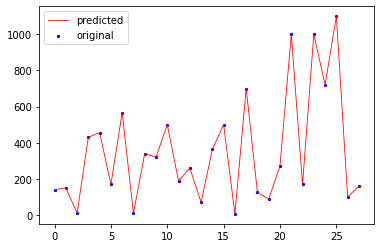

In [25]:
# plot
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [26]:
y_pred2 = pd.DataFrame(y_pred, columns=["Estimated Weight"])
y_pred2.head()

,Estimated Weight
0,140.008678
1,150.007827
2,9.812766
3,430.003804
4,455.997182


In [27]:
y_test2 = pd.DataFrame(y_test)
y_test2 = y_test2.reset_index(drop=True)
y_test2.head()

,0
0,140.0
1,150.0
2,9.8
3,430.0
4,456.0


In [28]:
y_new = pd.concat([y_test1, y_pred1], axis=1)
y_new

NameError: name 'y_test1' is not defined